In [1]:
import pandas as pd
import os

In [2]:
def format_his(df, station_col, datetime_col, value_col):
    df['col1'] = df.apply(lambda x: str(x[station_col]).ljust(8, ' '), axis=1)
    df['col2'] = df.apply(lambda x: '140.00'.rjust(7, ' '), axis=1)
    df['col3'] = df.apply(lambda x: x[datetime_col].strftime('%Y%m%d%H%M'), axis=1)
    df['col4'] = df.apply(lambda x: '{:12.5f}'.format(x[value_col]), axis=1)

    df['results'] = df.apply(lambda x: '{}{}{}{}'.format(x['col1'], x['col2'], x['col3'], x['col4']), axis=1)
    return df

<AxesSubplot:xlabel='datetime'>

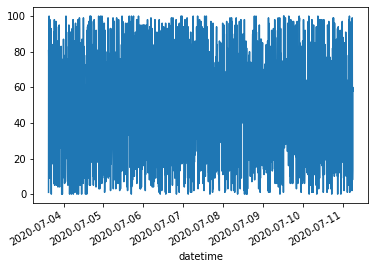

In [7]:
ws = '.'

excel_path = os.path.join(ws, 'flow.xlsx')

df = pd.read_excel(excel_path, 'flow')
df = pd.read_excel(excel_path, 'flow')

station_col = 'station'
datetime_col = 'date'
value_col = 'flow'

df['datetime'] = pd.to_datetime(df[datetime_col])
df.index = df['datetime']
# df[value_col].plot()
results = format_his(df, station_col, datetime_col, value_col)
out_his = os.path.join(ws, 'result.his')
results['results'].to_csv(out_his, index=False, header=False)
results[value_col].plot()
